<a href="https://colab.research.google.com/github/inwoo01/math2/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Iris.csv to Iris (17).csv
Error: [[0.28425301]]


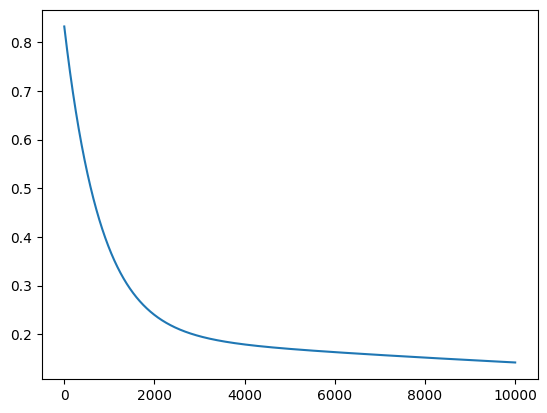

In [ ]:

from google.colab import files
import matplotlib.pyplot as plt

files.upload()

iris = pd.read_csv('Iris.csv')

# 입력 및 출력 변수 설정
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# 문자열 레이블을 숫자로 매핑
y_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = iris['Species'].map(y_mapping).values.reshape(-1, 1)

# 데이터 개수 설정
m = len(X)

# 입력 변수에 상수항 추가
Xb = np.c_[np.ones((m, 1)), X]

# 학습률 및 반복 횟수 설정
learning_rate = 0.00001
n_iter = 10000

# 모델 파라미터 초기화
theta = np.zeros((5, 1))

# 손실 함수 계산 함수 정의
def compute_J(theta, Xb, y):
    loss_vector = Xb.dot(theta) - y
    loss_vector = loss_vector.reshape(-1)
    loss_sum = np.sum(np.square(loss_vector)) / (2 * m)
    return loss_sum

# 경사 하강법 수행
loss_arr = []
for i in range(n_iter):
    gradients = (1.0 / m) * Xb.T.dot(Xb.dot(theta) - y)
    theta = theta - learning_rate * gradients
    loss = compute_J(theta, Xb, y)
    loss_arr.append(loss)

# 손실 함수 값 출력
plt.plot(loss_arr)

# 예측값 계산
y_hat = Xb.dot(theta)

# 에러 계산
error = (1 / m) * (y_hat - y).T.dot(y_hat - y)
print("Error:", error)

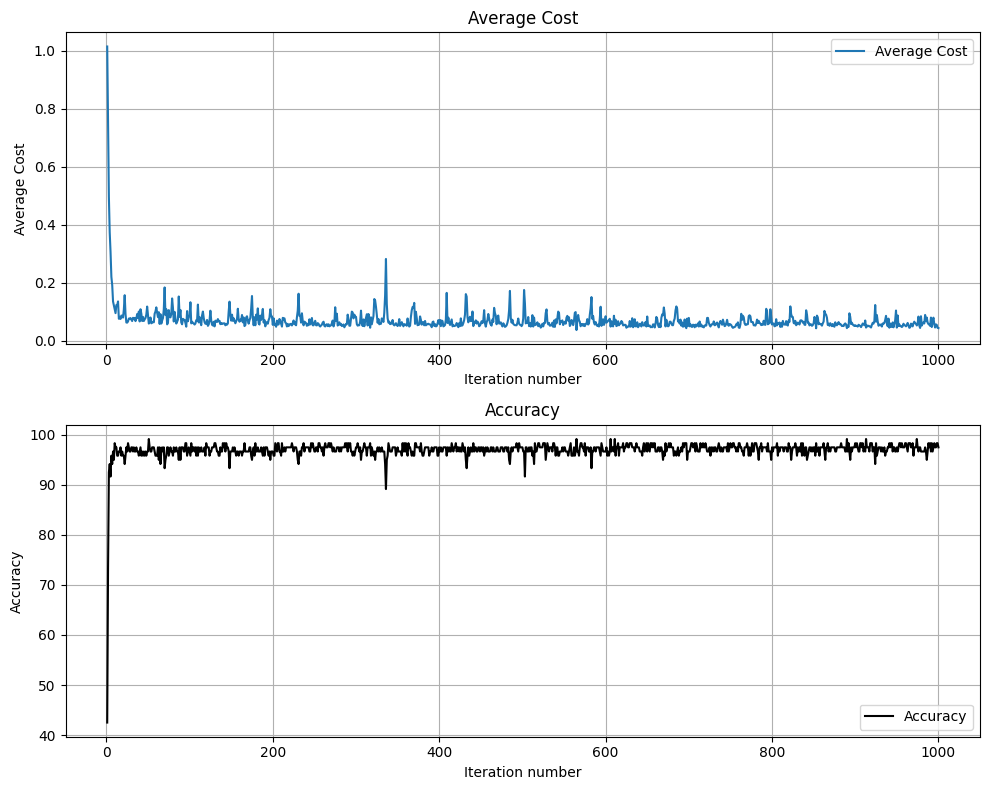

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('Iris.csv')

# 입력과 출력 분리
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터로더 생성
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# 신경망 모델 정의
class IrisModel(nn.Module):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 및 손실 함수, 최적화기 생성
model = IrisModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 학습
num_iterations = 1000
avg_costs = []
accuracies = []  # 정확도를 저장할 리스트

for iteration in range(num_iterations):
    total_loss = 0
    correct = 0  # 맞춘 개수 초기화
    total = 0  # 총 개수 초기화
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # 정확도 계산
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / len(train_loader)
    avg_costs.append(avg_loss)

    # 정확도 계산
    accuracy = 100*(correct / total)
    accuracies.append(accuracy)

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 평균 비용 그래프
ax1.plot(range(1, num_iterations+1), avg_costs, linestyle='-', label='Average Cost')
ax1.set_title('Average Cost')
ax1.set_xlabel('Iteration number')
ax1.set_ylabel('Average Cost')
ax1.grid(True)
ax1.legend()

# 정확도 그래프
ax2.plot(range(1, num_iterations+1), accuracies, label='Accuracy', color='black')
ax2.set_title('Accuracy')
ax2.set_xlabel('Iteration number')
ax2.set_ylabel('Accuracy')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

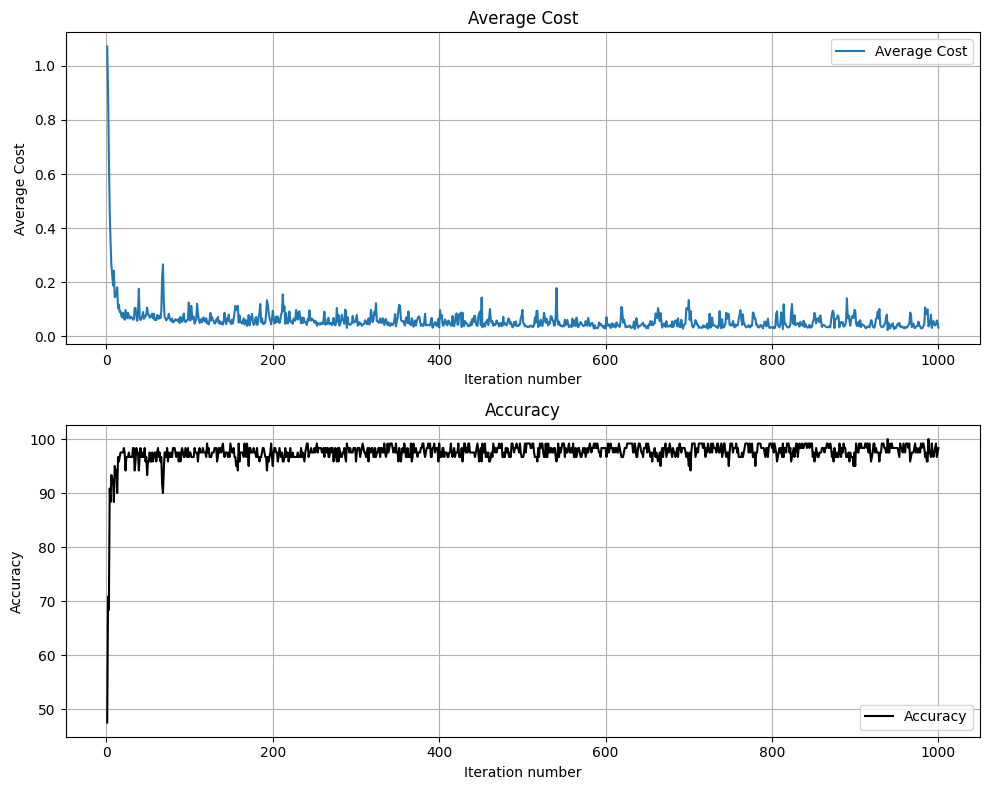

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('Iris.csv')

# 입력과 출력 분리
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# 데이터셋 생성
dataset = TensorDataset(X, y)

# 데이터셋 크기 계산
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

# 데이터셋 분할
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# 데이터로더 생성
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 신경망 모델 정의
class IrisModel(nn.Module):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 및 손실 함수, 최적화기 생성
model = IrisModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 학습
num_iterations = 1000
avg_costs = []
accuracies = []  # 정확도를 저장할 리스트

for iteration in range(num_iterations):
    total_loss = 0
    correct = 0  # 맞춘 개수 초기화
    total = 0  # 총 개수 초기화
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # 정확도 계산
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / len(train_loader)
    avg_costs.append(avg_loss)

    # 정확도 계산
    accuracy = 100*(correct / total)
    accuracies.append(accuracy)

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 평균 비용 그래프
ax1.plot(range(1, num_iterations+1), avg_costs, linestyle='-', label='Average Cost')
ax1.set_title('Average Cost')
ax1.set_xlabel('Iteration number')
ax1.set_ylabel('Average Cost')
ax1.grid(True)
ax1.legend()

# 정확도 그래프
ax2.plot(range(1, num_iterations+1), accuracies, label='Accuracy', color='black')
ax2.set_title('Accuracy')
ax2.set_xlabel('Iteration number')
ax2.set_ylabel('Accuracy')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

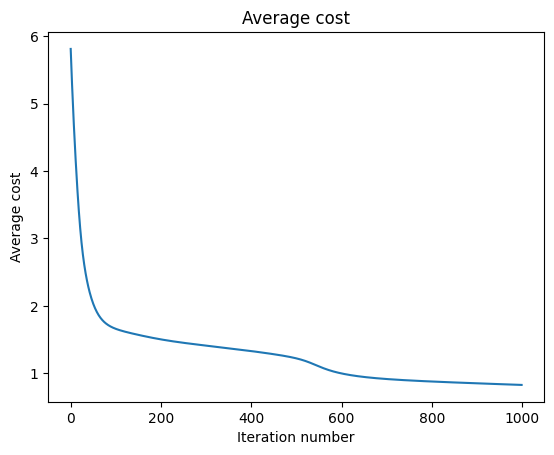

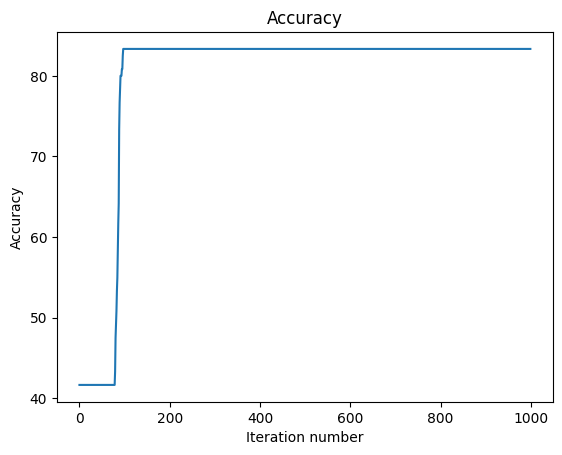

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 손실 함수 정의
def loss(y_pred, y_true):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

# 가중치 초기화
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# 신경망 정의
def neural_network(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A1, A2

# 학습
def train(X, y, learning_rate, num_iterations):
    input_size = X.shape[1]
    hidden_size = 16
    output_size = 3

    # 가중치 초기화
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    # 학습
    costs = []
    accuracies = []
    for i in range(num_iterations):
        # Forward pass
        A1, A2 = neural_network(X, W1, b1, W2, b2)

        # Loss
        cost = loss(A2, y)
        costs.append(cost)

        # Accuracy
        y_pred_labels = np.argmax(A2, axis=1)
        y_true_labels = np.argmax(y, axis=1)
        accuracy = 100*(np.mean(y_pred_labels == y_true_labels))
        accuracies.append(accuracy)

        # Backpropagation
        m = y.shape[0]
        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * (A1 * (1 - A1))
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Gradient descent
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    return W1, b1, W2, b2, costs, accuracies

# 데이터 로드
data = pd.read_csv('Iris.csv')

# 입력과 출력 분리
X = data.iloc[:, 1:-1].values
y = pd.get_dummies(data.iloc[:, -1]).values

# 학습
learning_rate = 0.01
num_iterations = 1000
W1, b1, W2, b2, costs, accuracies = train(train_X, train_y, learning_rate, num_iterations)

# 손실 그래프 그리기
plt.plot(range(num_iterations), costs)
plt.xlabel('Iteration number')
plt.ylabel('Average cost')
plt.title('Average cost')
plt.show()

# 정확도 그래프 그리기
plt.plot(range(num_iterations), accuracies)
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

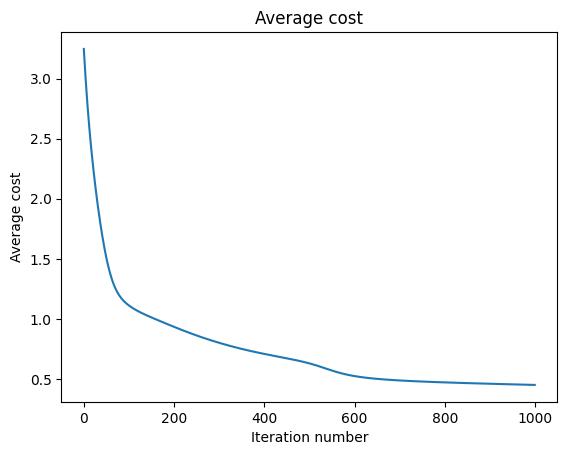

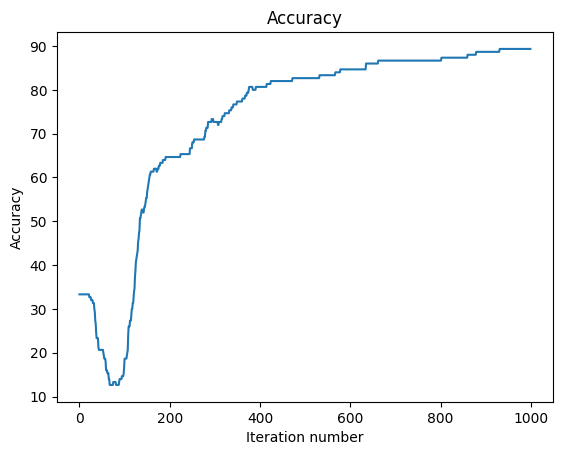

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 소프트맥스 함수 정의
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# 손실 함수 정의
def loss(y_pred, y_true):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred)) / m

# 가중치 초기화
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# 신경망 정의
def neural_network(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2

# 학습
def train(X, y, learning_rate, num_iterations):
    input_size = X.shape[1]
    hidden_size = 16
    output_size = y.shape[1]  # 출력층 뉴런 수를 클래스의 수에 맞게 설정

    # 가중치 초기화
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    # 학습
    costs = []
    accuracies = []
    for i in range(num_iterations):
        # Forward pass
        Z1, A1, Z2 = neural_network(X, W1, b1, W2, b2)

        # 소프트맥스 함수 적용
        A2 = softmax(Z2)

        # Loss
        cost = loss(A2, y)
        costs.append(cost)

        # Accuracy
        y_pred_labels = np.argmax(A2, axis=1)
        y_true_labels = np.argmax(y, axis=1)
        accuracy = 100 * (np.mean(y_pred_labels == y_true_labels))
        accuracies.append(accuracy)

        # Backpropagation
        m = y.shape[0]
        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * (A1 * (1 - A1))
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Gradient descent
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    return W1, b1, W2, b2, costs, accuracies

# 데이터 로드
data = pd.read_csv('Iris.csv')

# 입력과 출력 분리
X = data.iloc[:, 1:-1].values
y = pd.get_dummies(data.iloc[:, -1]).values

# 학습
learning_rate = 0.01
num_iterations = 1000
W1, b1, W2, b2, costs, accuracies = train(X, y, learning_rate, num_iterations)

# 손실 그래프 그리기
plt.plot(range(num_iterations), costs)
plt.xlabel('Iteration number')
plt.ylabel('Average cost')
plt.title('Average cost')
plt.show()

# 정확도 그래프 그리기
plt.plot(range(num_iterations), accuracies)
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()